In [1]:
#새만금과 낙동강 하구 영역 추출
import netCDF4 as nc
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import time
from scipy import io

import cv2
import csv
import glob
import math
from tqdm import tqdm
import matplotlib.patches as patches

In [1]:
import os
import netCDF4 as nc

file = '/media/juneyonglee/My Book/UST21/Daily/2021/01/UST21_L3_Merged-Chla-1D_20210101.nc'

# 파일 존재 여부 확인
if os.path.exists(file):
    try:
        # NetCDF 파일 열기
        f = nc.Dataset(file, 'r')
        lon, lat = f['lon'][:].data, f['lat'][:].data
        print('파일 읽기 성공')
    except OSError as e:
        print(f"파일을 읽는 중 오류 발생: {e}")
else:
    print("파일이 존재하지 않거나 경로가 잘못되었습니다.")


파일 읽기 성공


In [3]:
lon.shape, lat.shape

((8000, 10500), (8000, 10500))

In [4]:
lon

array([[111.604034, 111.60793 , 111.61183 , ..., 150.84639 , 150.85059 ,
        150.85478 ],
       [111.60569 , 111.60959 , 111.61349 , ..., 150.84398 , 150.84818 ,
        150.85239 ],
       [111.60734 , 111.611244, 111.61514 , ..., 150.84158 , 150.84578 ,
        150.84998 ],
       ...,
       [116.91406 , 116.916626, 116.91919 , ..., 143.37364 , 143.37628 ,
        143.3789  ],
       [116.91432 , 116.916885, 116.91945 , ..., 143.37329 , 143.37592 ,
        143.37856 ],
       [116.91457 , 116.91714 , 116.9197  , ..., 143.37294 , 143.37556 ,
        143.3782  ]], dtype=float32)

In [5]:
lat_min, lat_max = 35.00, 35.20
lon_min, lon_max = 128.80, 129.10


In [6]:
mask1 = ((lat >= lat_min) & (lat <= lat_max) &
        (lon >= lon_min) & (lon <= lon_max)).astype(int) #낙동강

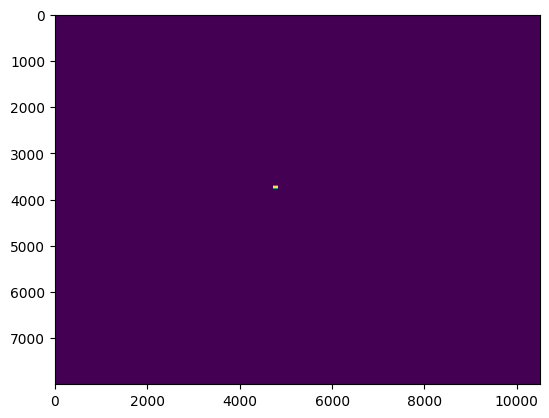

In [7]:
plt.imshow(mask1)

In [8]:

lat_min, lat_max = 35.70, 36.00
lon_min, lon_max = 126.20, 126.50

In [9]:
mask2 = ((lat >= lat_min) & (lat <= lat_max) &
        (lon >= lon_min) & (lon <= lon_max)).astype(int) #낙동강

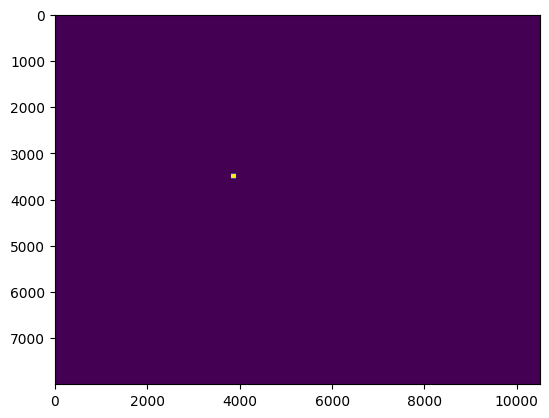

In [10]:
plt.imshow(mask2)

In [11]:
nakdong_coords = np.argwhere(mask1)
nakdong_top_left = nakdong_coords.min(axis=0)
nakdong_bottom_right = nakdong_coords.max(axis=0)
nakdong_width = nakdong_bottom_right[1] - nakdong_top_left[1]
nakdong_height = nakdong_bottom_right[0] - nakdong_top_left[0]

saemangeum_coords = np.argwhere(mask2)
saemangeum_top_left = saemangeum_coords.min(axis=0)
saemangeum_bottom_right = saemangeum_coords.max(axis=0)
saemangeum_width = saemangeum_bottom_right[1] - saemangeum_top_left[1]
saemangeum_height = saemangeum_bottom_right[0] - saemangeum_top_left[0]

nakdong_top_left, nakdong_width, nakdong_height, saemangeum_top_left, saemangeum_width, saemangeum_height

(array([3710, 4711]), 106, 63, array([3454, 3801]), 106, 95)

In [30]:
# UST21
mat_file = io.loadmat('/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat')
mask = mat_file['Land']
# GOCI
land_sea_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy'
land_sea_mask = np.load(land_sea_mask_path)

In [13]:
mask.shape

(8000, 10500)

In [31]:
land_sea_mask.shape

(5685, 5567)

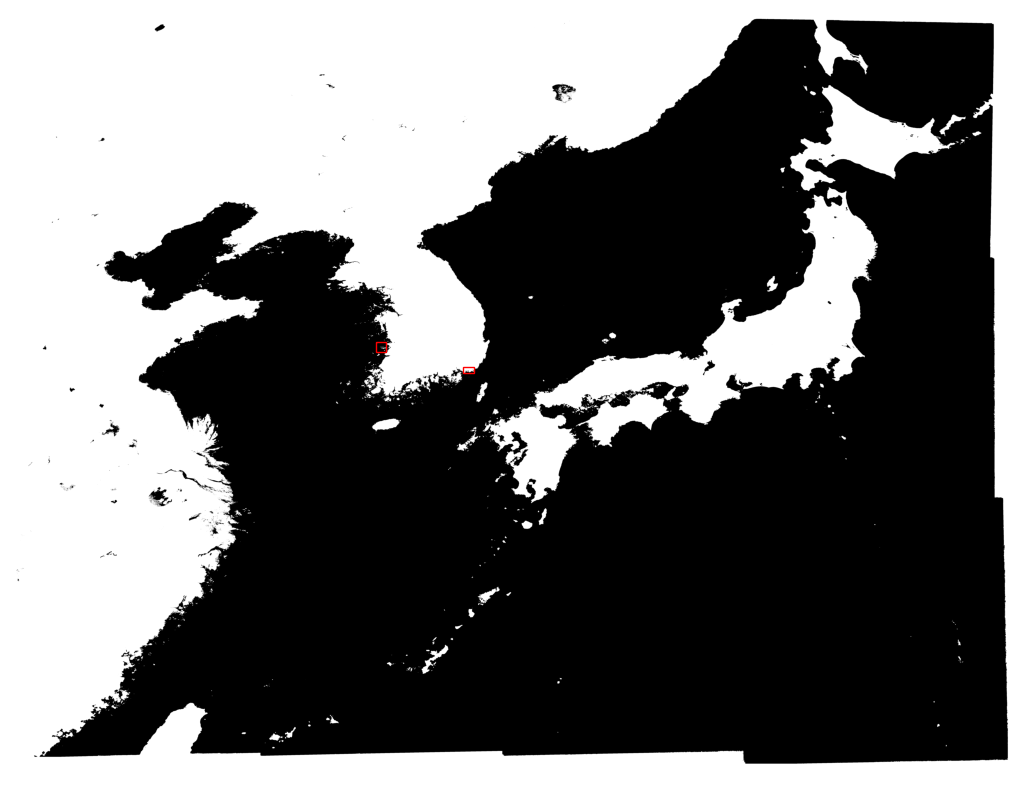

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(mask, cmap='gray')

nakdong_rect = patches.Rectangle((nakdong_top_left[1], nakdong_top_left[0]), nakdong_width, nakdong_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(nakdong_rect)

# 새만금에 사각형 추가
saemangeum_rect = patches.Rectangle((saemangeum_top_left[1], saemangeum_top_left[0]), saemangeum_width, saemangeum_height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(saemangeum_rect)

ax.axis('off')  # 축 정보 숨기기
plt.show()

In [15]:
# 낙동강 하구와 새만금의 변환된 위도 경도
nakdong_lat, nakdong_lon = 35.07, 128.93
saemangeum_lat, saemangeum_lon = 35.84, 126.54

# 낙동강 하구에 대한 거리 계산
distances_to_nakdong = np.sqrt((lat - nakdong_lat)**2 + (lon - nakdong_lon)**2)
closest_idx_to_nakdong = np.unravel_index(np.argmin(distances_to_nakdong), distances_to_nakdong.shape)

# 새만금에 대한 거리 계산
distances_to_saemangeum = np.sqrt((lat - saemangeum_lat)**2 + (lon - saemangeum_lon)**2)
closest_idx_to_saemangeum = np.unravel_index(np.argmin(distances_to_saemangeum), distances_to_saemangeum.shape)

closest_idx_to_nakdong, closest_idx_to_saemangeum


((3751, 4757), (3505, 3920))

In [16]:
closest_idx_to_nakdong

(3751, 4757)

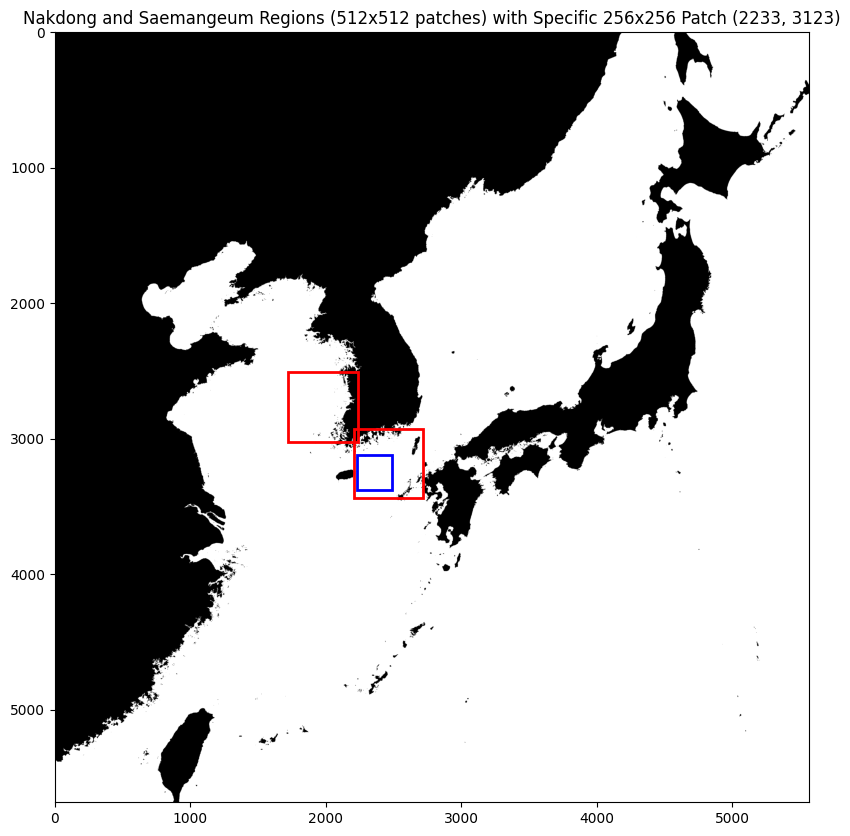

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load land-sea mask
land_sea_mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy'
land_sea_mask = np.load(land_sea_mask_path)

# Define the ocean mask (convert sea 0 to 1, land -1 to 0)
ocean_mask = np.where(land_sea_mask == 0, 1, 0)
# ocean_mask = land_sea_mask
# Define the patch size and region coordinates
patch_size = 512

# Nakdong coordinates
region1_center_x, region1_center_y = (2336 + 2592) // 2, (3053 + 3309) // 2
# Saemangeum coordinates
region2_center_x, region2_center_y = (1851 + 2107) // 2, (2639 + 2895) // 2

# Calculate the top-left coordinates for the 512x512 patches
region1_x_min, region1_y_min = region1_center_x - patch_size // 2, region1_center_y - patch_size // 2
region1_x_max, region1_y_max = region1_center_x + patch_size // 2, region1_center_y + patch_size // 2

region2_x_min, region2_y_min = region2_center_x - patch_size // 2, region2_center_y - patch_size // 2
region2_x_max, region2_y_max = region2_center_x + patch_size // 2, region2_center_y + patch_size // 2

# Add the 256x256 patch coordinates for the specific RRS_band_2_nak_2020-05-30_r2233_c3123.tiff file
specific_patch_row, specific_patch_col = 2233, 3123
specific_patch_size = 256

# Calculate the top-left coordinates for the 256x256 patch
specific_x_min = specific_patch_row
specific_y_min = specific_patch_col
specific_x_max = specific_patch_row + specific_patch_size
specific_y_max = specific_patch_col + specific_patch_size

# Plot the ocean mask
plt.figure(figsize=(10, 10))
plt.imshow(ocean_mask, cmap='gray')

# Add a red rectangle for the Nakdong region (512x512)
rect1 = Rectangle((region1_x_min, region1_y_min), patch_size, patch_size, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect1)

# Add a red rectangle for the Saemangeum region (512x512)
rect2 = Rectangle((region2_x_min, region2_y_min), patch_size, patch_size, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect2)

# Add a blue rectangle for the specific patch (256x256) - row 2233, col 3123
rect3 = Rectangle((specific_x_min, specific_y_min), specific_patch_size, specific_patch_size, linewidth=2, edgecolor='b', facecolor='none')
plt.gca().add_patch(rect3)

# Title and display
plt.title('Nakdong and Saemangeum Regions (512x512 patches) with Specific 256x256 Patch (2233, 3123)')
plt.show()


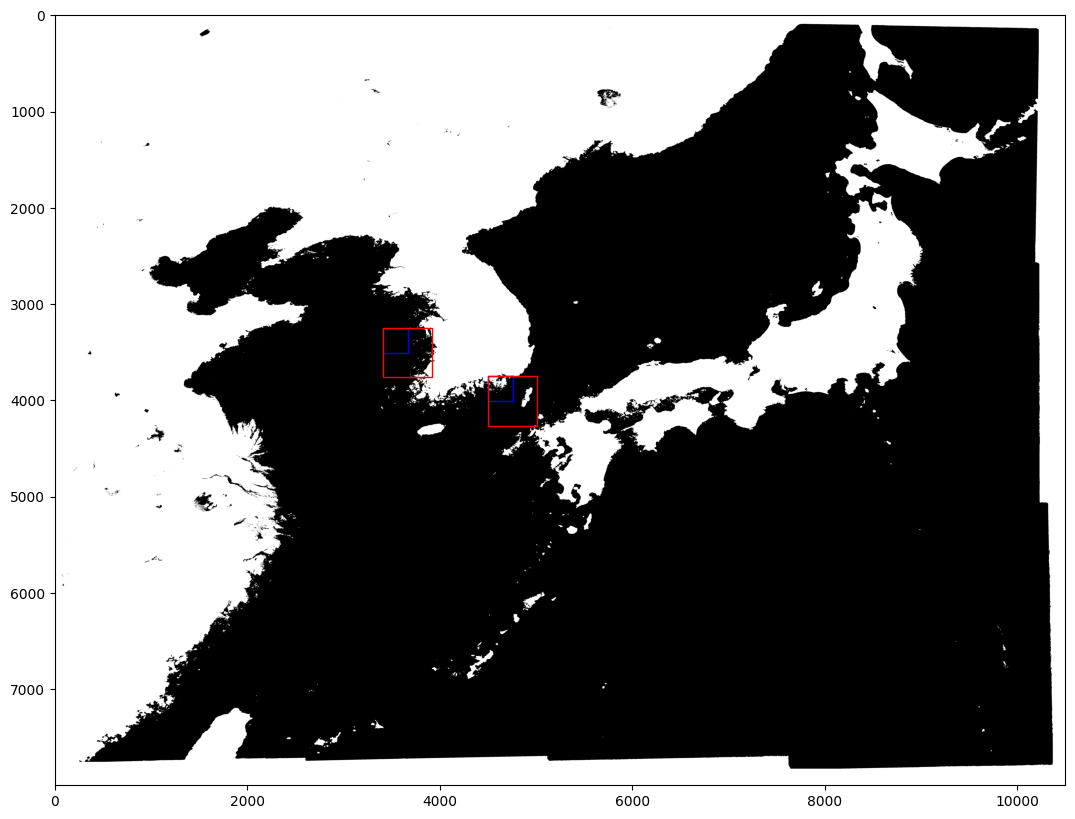

In [50]:
# 위에서 계산한 가장 가까운 픽셀의 인덱스
x_nakdong, y_nakdong = closest_idx_to_nakdong  # 낙동강 하구 위치
x_saemangeum, y_saemangeum = closest_idx_to_saemangeum  # 새만금 위치

fig, ax = plt.subplots(1, figsize=(15, 10))
ax.imshow(mask, cmap='gray')  # 데이터에 맞는 색상 맵 사용

# 낙동강 하구 위치에 파란색 박스 추가
rect_nakdong = plt.Rectangle((y_nakdong-256, x_nakdong), 256, 256, edgecolor='blue', facecolor='none')
ax.add_patch(rect_nakdong)

# 새만금 위치에 파란색 박스 추가
rect_saemangeum = plt.Rectangle((y_saemangeum-512, x_saemangeum-256), 256, 256, edgecolor='blue', facecolor='none')
ax.add_patch(rect_saemangeum)

# 낙동강 하구 위치에 빨간색 박스 추가
rect_nakdong = plt.Rectangle((y_nakdong-256, x_nakdong), 512,512, edgecolor='red', facecolor='none')
ax.add_patch(rect_nakdong)

# 새만금 위치에 빨간색 박스 추가
rect_saemangeum = plt.Rectangle((y_saemangeum-512, x_saemangeum-256), 512, 512, edgecolor='red', facecolor='none')
ax.add_patch(rect_saemangeum)

plt.show()


In [18]:
# save_path = '/media/juneyonglee/My Book/Preprocessed/UST21/Chl-a/Ocean'
# if not os.path.isdir(save_path):
#     os.makedirs(save_path)

In [19]:
x_nakdong, y_nakdong

(3751, 4757)

In [20]:
x_saemangeum,y_saemangeum

(3505, 3920)

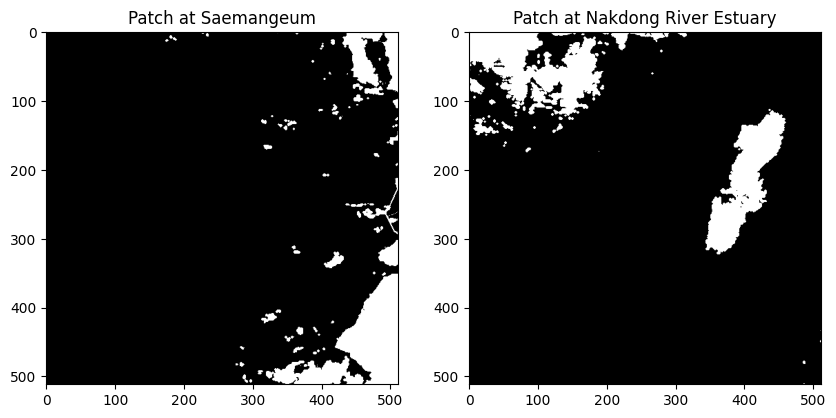

In [21]:
# # 데이터에서 낙동강 하구 위치의 256x256 패치 추출
# patch_nakdong = mask[x_nakdong:x_nakdong+256, y_nakdong-128:y_nakdong+128]

# # 데이터에서 새만금 위치의 256x256 패치 추출
# patch_saemangeum = mask[x_saemangeum-128:x_saemangeum+128, y_saemangeum-256:y_saemangeum]

# 데이터에서 낙동강 하구 위치의 512*512 패치 추출
patch_nakdong = mask[x_nakdong:x_nakdong+512, y_nakdong-256:y_nakdong+256]

# 데이터에서 새만금 위치의 512*512 패치 추출
patch_saemangeum = mask[x_saemangeum-256:x_saemangeum+256, y_saemangeum-512:y_saemangeum]


# 추출된 데이터를 보기 위한 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[1].imshow(patch_nakdong, cmap='gray')
axs[1].set_title('Patch at Nakdong River Estuary')
axs[0].imshow(patch_saemangeum, cmap='gray')
axs[0].set_title('Patch at Saemangeum')


plt.show()



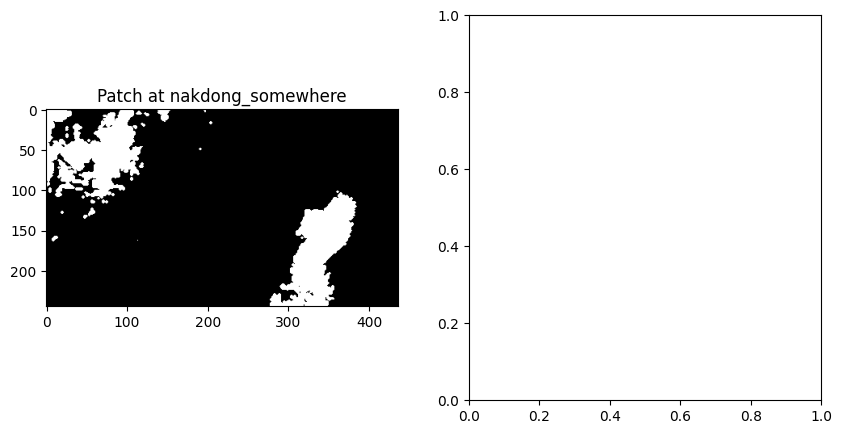

In [22]:
# 데이터에서 낙동강 하구 위치의 패치를 추출
patch_nakdong_somewhere = mask[x_nakdong+12:x_nakdong+256, y_nakdong-181:y_nakdong+256]
# 3389 3483

# 3377, 3664
# 추출된 데이터를 보기 위한 시각화
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(patch_nakdong_somewhere, cmap='gray')
axs[0].set_title('Patch at nakdong_somewhere')

plt.show()


In [23]:
x_nakdong,x_nakdong+256, y_nakdong-128,y_nakdong+128

(3751, 4007, 4629, 4885)

In [24]:
x_nakdong, y_nakdong-128

(3751, 4629)

In [25]:
x_saemangeum-128, y_saemangeum-256

(3377, 3664)

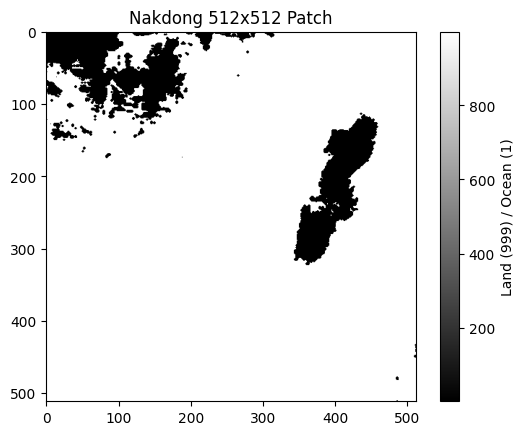

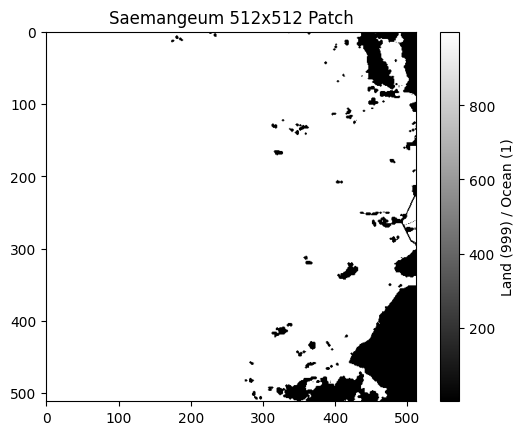

Images saved and displayed for Nakdong and Saemangeum patches.


In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

########## path ##########
mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat'
save_dir = '/home/juneyonglee/Desktop/AY_ust/Notebook/ust21_nak_sae_512patch'  # Directory to save the images

# Load land-sea mask from the .mat file
land_sea_mask = io.loadmat(mask_path)['Land']  # Load the 'Land' variable

# Convert land (0) to 999 (red) and ocean (1) to 1
land_sea_mask = np.where(land_sea_mask == 0, 999, 1)

######### point #########
x_nak, y_nak = 3751, 4757  # Starting point for Nakdong region
x_sae, y_sae = 3505, 3920  # Starting point for Saemangeum region
##########################

# Ensure the save directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Extract 512x512 patches for Nakdong and Saemangeum regions
nakdong_patch_512 = land_sea_mask[x_nak:x_nak+512, y_nak-256:y_nak+256]
saemangeum_patch_512 = land_sea_mask[x_sae-256:x_sae+256, y_sae-512:y_sae]

# Function to save and display a patch as an image for visualization
def save_and_display_patch(patch, title, file_path):
    plt.imshow(patch, cmap='gray')
    plt.title(title)
    plt.colorbar(label='Land (999) / Ocean (1)')
    plt.savefig(file_path, bbox_inches='tight')
    plt.show()  # Display the image

# Save and display Nakdong patch
nakdong_image_path = os.path.join(save_dir, 'nakdong_patch_512.png')
save_and_display_patch(nakdong_patch_512, 'Nakdong 512x512 Patch', nakdong_image_path)

# Save and display Saemangeum patch
saemangeum_image_path = os.path.join(save_dir, 'saemangeum_patch_512.png')
save_and_display_patch(saemangeum_patch_512, 'Saemangeum 512x512 Patch', saemangeum_image_path)

print("Images saved and displayed for Nakdong and Saemangeum patches.")


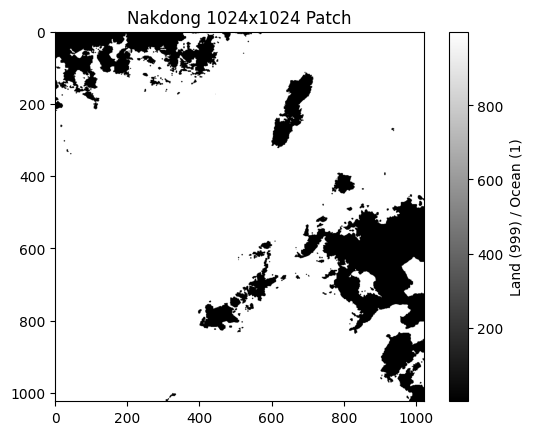

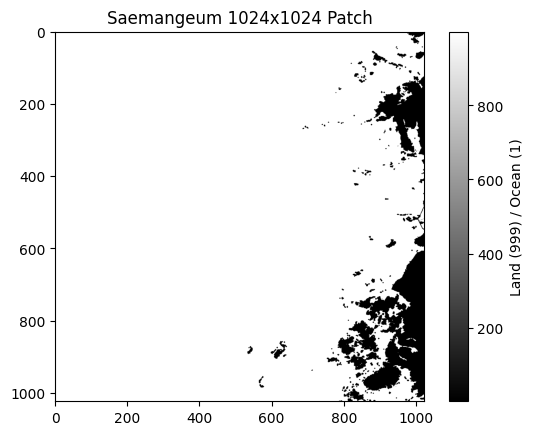

Images saved and displayed for Nakdong and Saemangeum patches.


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

########## path ##########
mask_path = '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat'
save_dir = '/home/juneyonglee/Desktop/AY_ust/Notebook/ust21_nak_sae_1024patch'  # Directory to save the images

# Load land-sea mask from the .mat file
land_sea_mask = io.loadmat(mask_path)['Land']  # Load the 'Land' variable

# Convert land (0) to 999 (red) and ocean (1) to 1
land_sea_mask = np.where(land_sea_mask == 0, 999, 1)

######### point #########
x_nak, y_nak = 3751, 4757  # Starting point for Nakdong region
x_sae, y_sae = 3505, 3920  # Starting point for Saemangeum region
##########################

# Ensure the save directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Extract 1024x1024 patches for Nakdong and Saemangeum regions
nakdong_patch_1024 = land_sea_mask[x_nak:x_nak+1024, y_nak-512:y_nak+512]
saemangeum_patch_1024 = land_sea_mask[x_sae-512:x_sae+512, y_sae-1024:y_sae]

# Function to save and display a patch as an image for visualization
def save_and_display_patch(patch, title, file_path):
    plt.imshow(patch, cmap='gray')
    plt.title(title)
    plt.colorbar(label='Land (999) / Ocean (1)')
    plt.savefig(file_path, bbox_inches='tight')
    plt.show()  # Display the image

# Save and display Nakdong patch
nakdong_image_path = os.path.join(save_dir, 'nakdong_patch_1024.png')
save_and_display_patch(nakdong_patch_1024, 'Nakdong 1024x1024 Patch', nakdong_image_path)

# Save and display Saemangeum patch
saemangeum_image_path = os.path.join(save_dir, 'saemangeum_patch_1024.png')
save_and_display_patch(saemangeum_patch_1024, 'Saemangeum 1024x1024 Patch', saemangeum_image_path)

print("Images saved and displayed for Nakdong and Saemangeum patches.")
